In [1]:
import pandas as pd;
import numpy as np;
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
import scipy.stats as stats
from statsmodels.stats.multitest import multipletests

pd.set_option('display.float_format', lambda x: '%.2f' % x)

df = pd.read_csv(f'../../../../data/core-web-vitals/testrun-8/details/details-ssrh.csv', sep=',')

df = df[(df['type'] == 'LCP') & (df['idx'] > 5)]

features = ['start','end','duration','name','element','url','id']
target_features = ['start','end','duration']

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 500 entries, 5 to 504
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   idx       500 non-null    int64  
 1   site      500 non-null    object 
 2   date      500 non-null    object 
 3   time      500 non-null    object 
 4   type      500 non-null    object 
 5   start     500 non-null    float64
 6   end       500 non-null    float64
 7   duration  500 non-null    int64  
 8   name      500 non-null    int64  
 9   element   500 non-null    object 
 10  url       500 non-null    object 
 11  id        0 non-null      float64
dtypes: float64(3), int64(3), object(6)
memory usage: 50.8+ KB


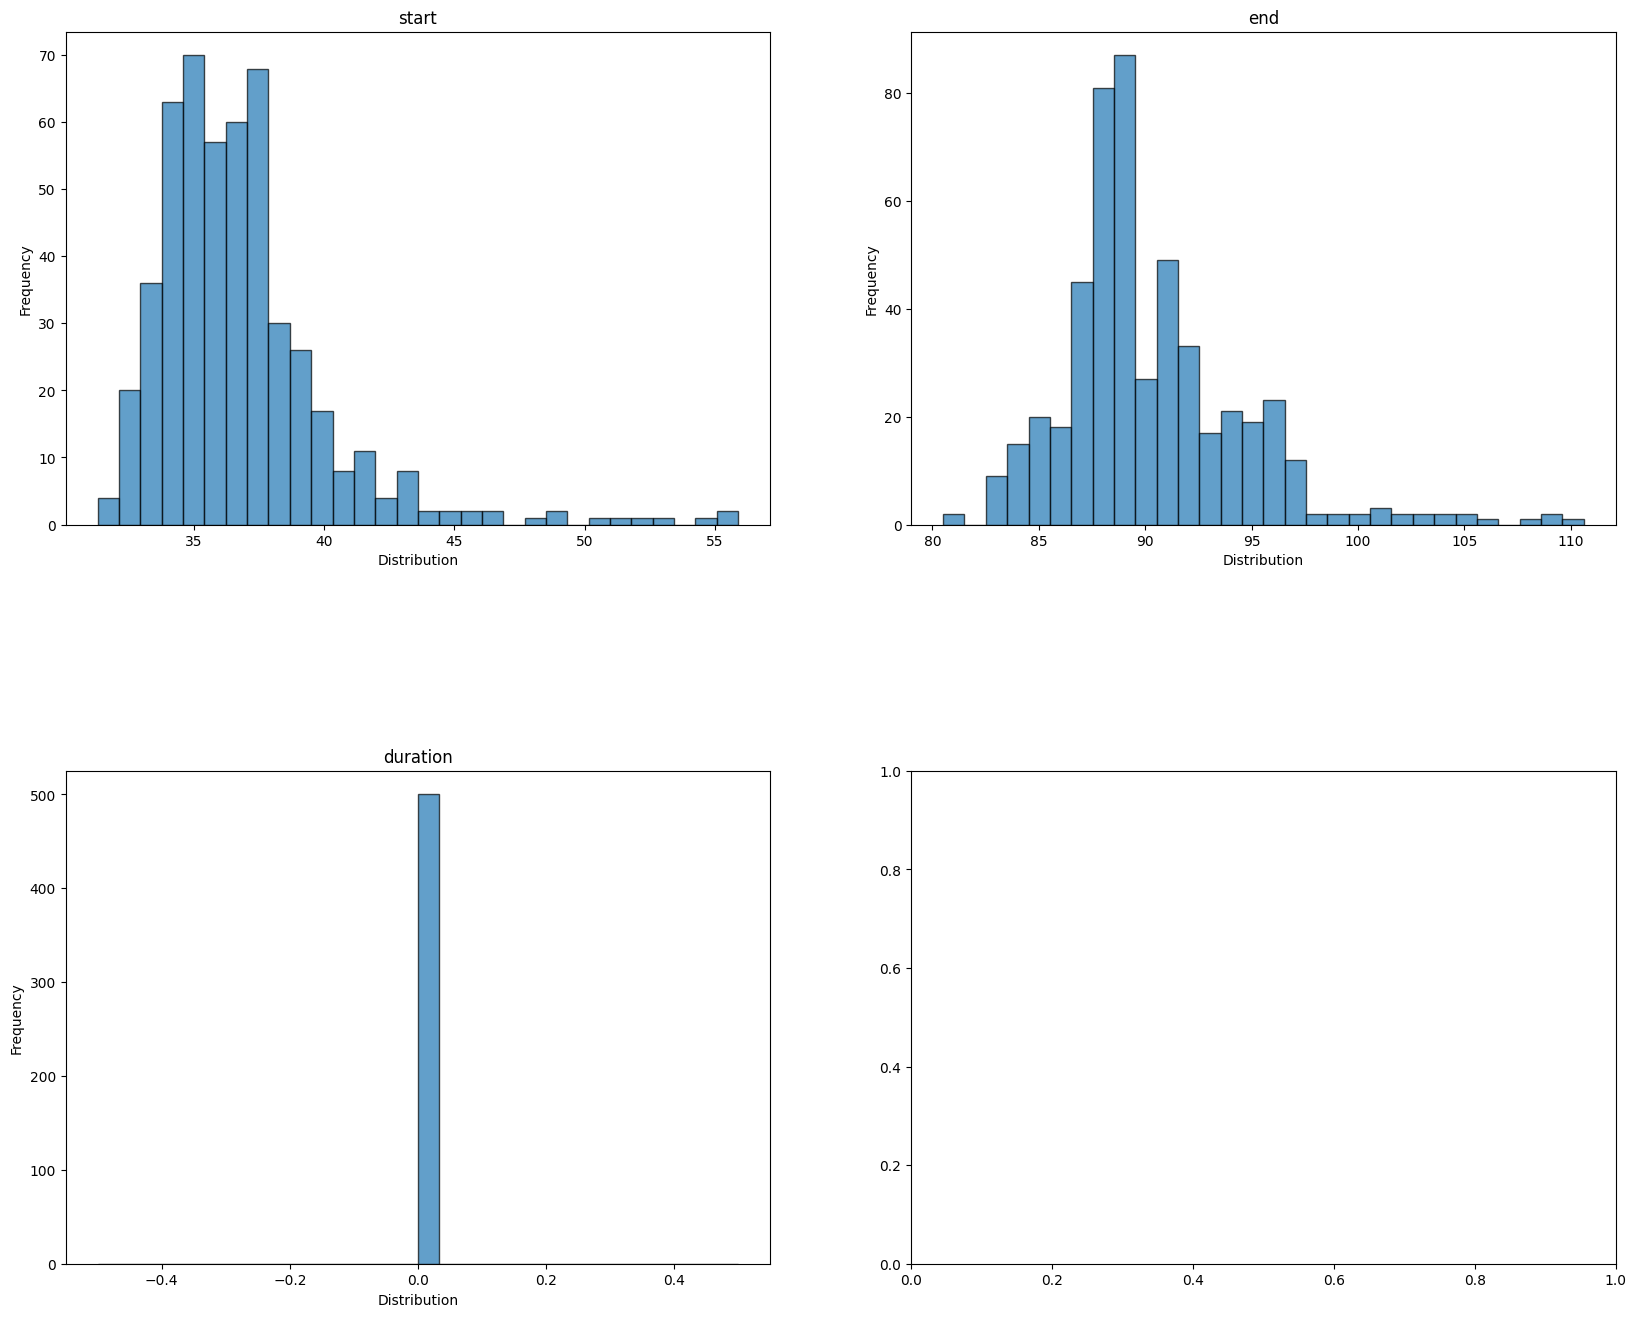

In [2]:
def ceildiv(a, b): 
    return -(a // -b)

def plot_histogram(f, loc):
    loc.hist(df[f].dropna(), bins=30, alpha=0.7, edgecolor='k')
    loc.set_title(f)
    loc.set_ylabel('Frequency')
    loc.set_xlabel(f'Distribution')

def graphs(plot_func, features, cols=2, height=8):
    rows = ceildiv(len(features), cols)
    _, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(20, height*rows))
    plt.subplots_adjust(hspace=0.5)
    for i, feature in enumerate(features):
        loc = axes[i // cols, i % cols] if rows > 1 and cols > 1 else axes[i % cols]
        plot_func(feature, loc)
    return plt

plt = graphs(plot_histogram, target_features)
plt.show()

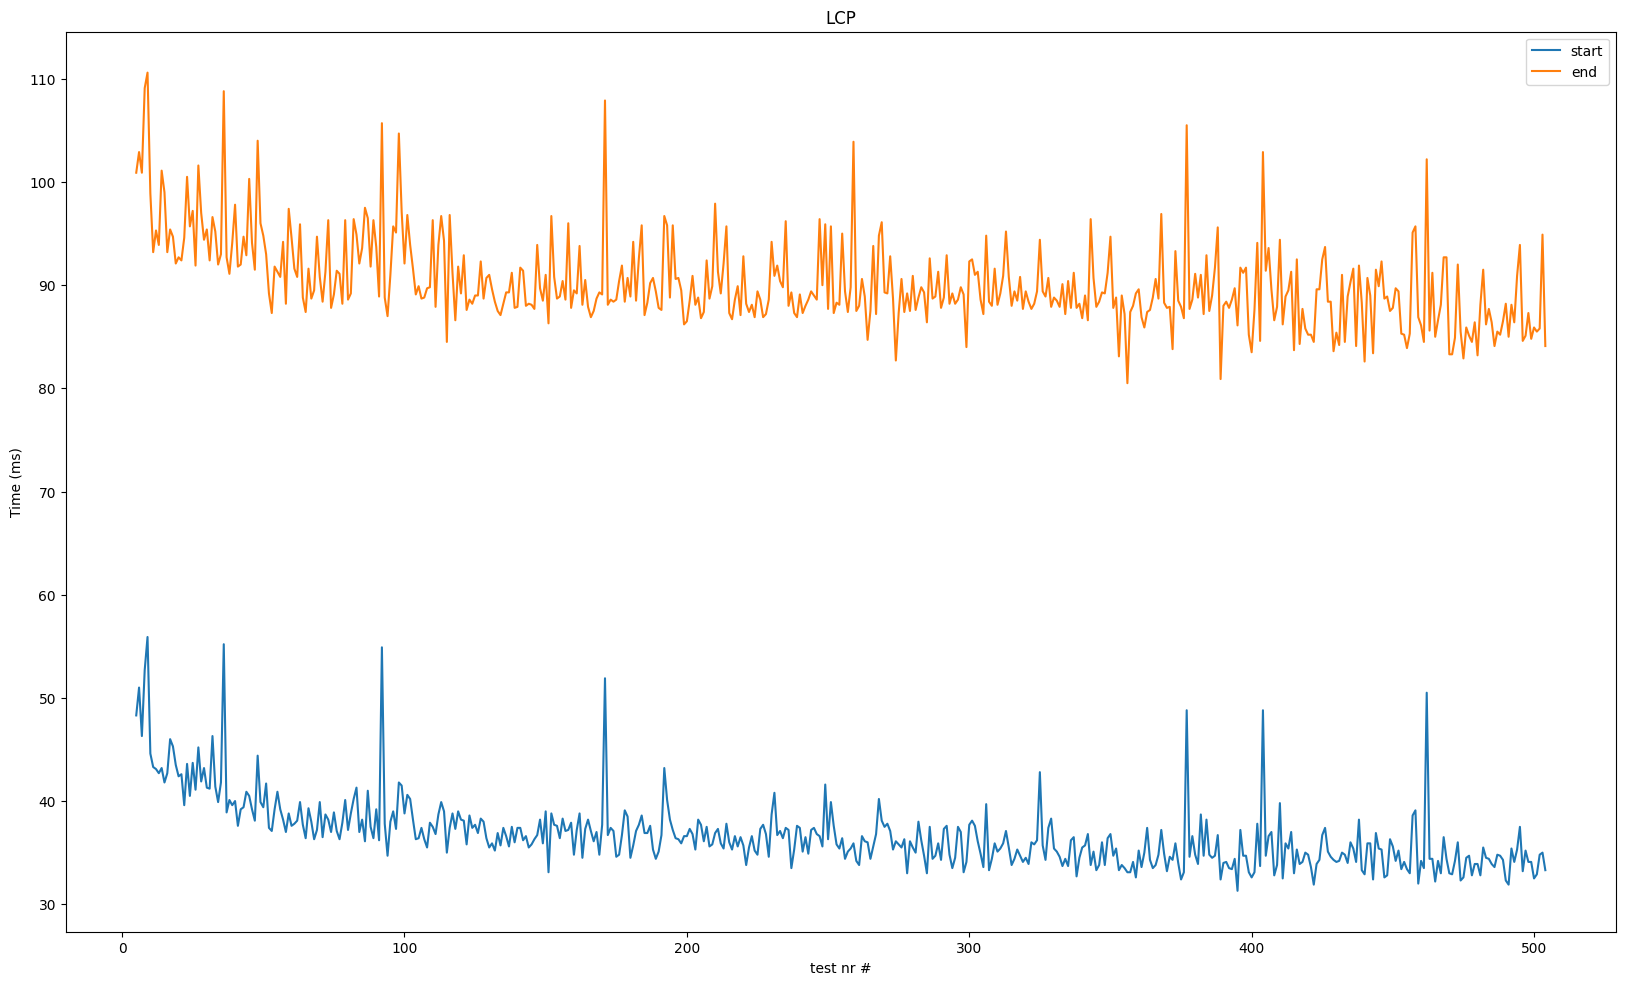

In [3]:
def plot_line_graph(features, loc):
    for f in features:
        loc.plot(df[f], label=f)
    
    loc.set_title("LCP")
    loc.set_ylabel('Time (ms)')
    loc.set_xlabel('test nr #')
    loc.legend()

def graphs(plot_func, features, height=10):
    _, ax = plt.subplots(figsize=(20, height))
    plot_func(features, ax)
    plt.subplots_adjust(hspace=0.3, top=0.95, bottom=0.05)
    return plt

graphs(plot_line_graph, ['start','end'])
plt.show()

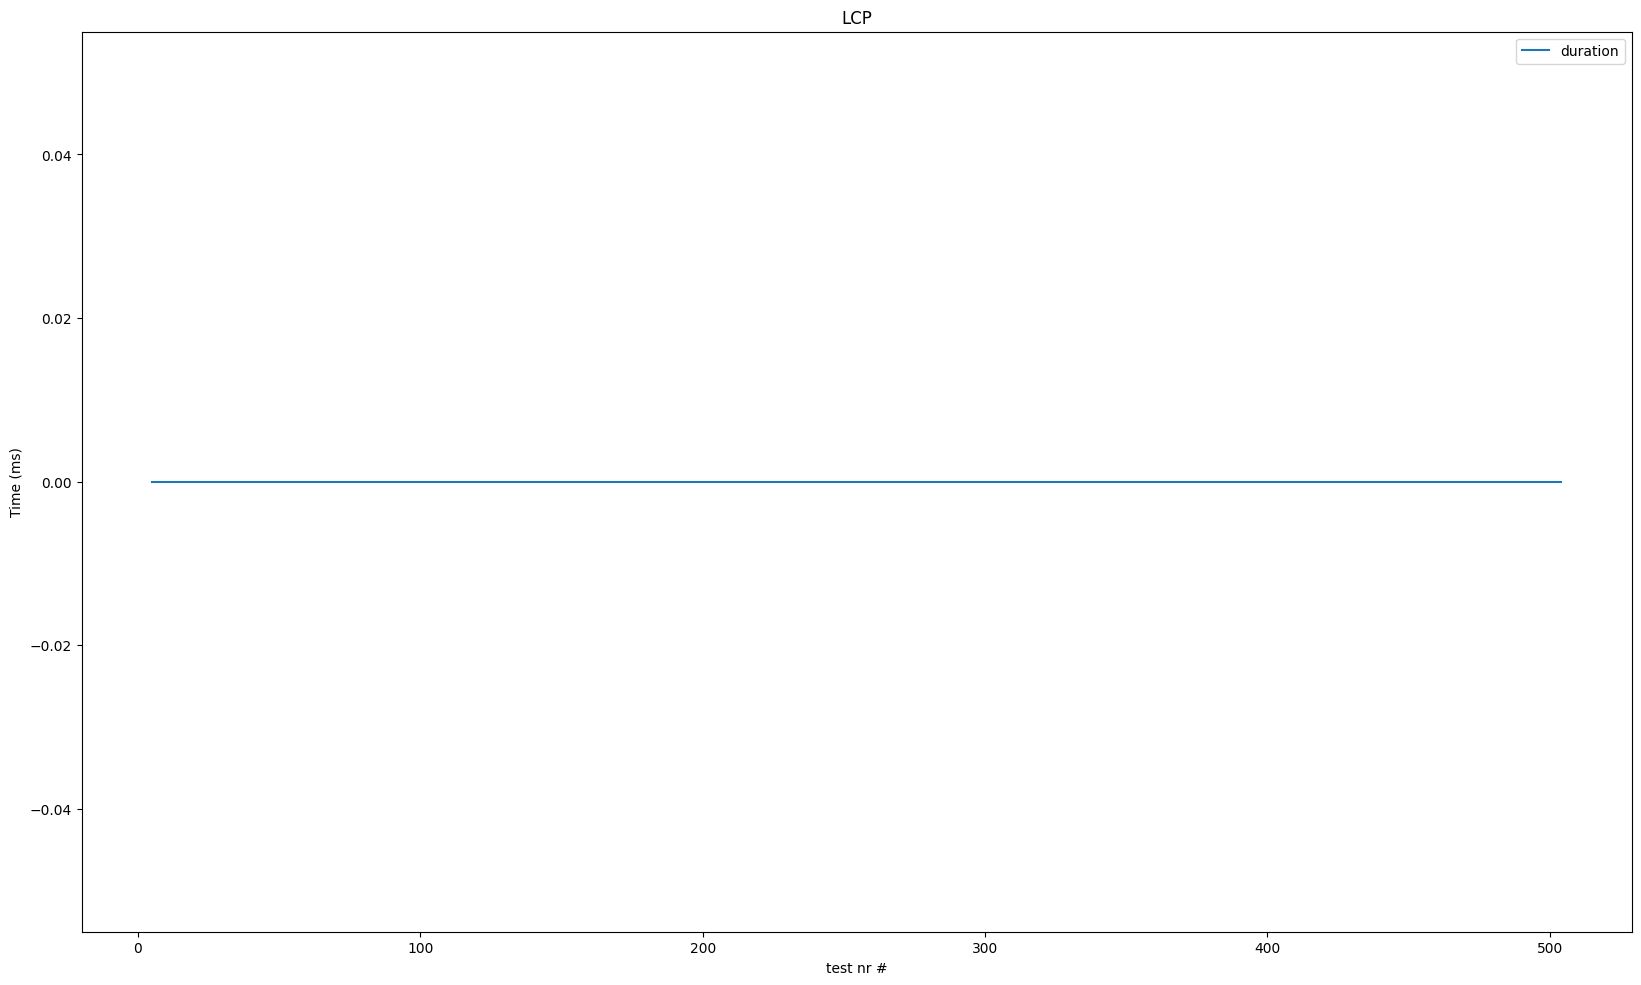

In [4]:
graphs(plot_line_graph, ['duration'])
plt.show()

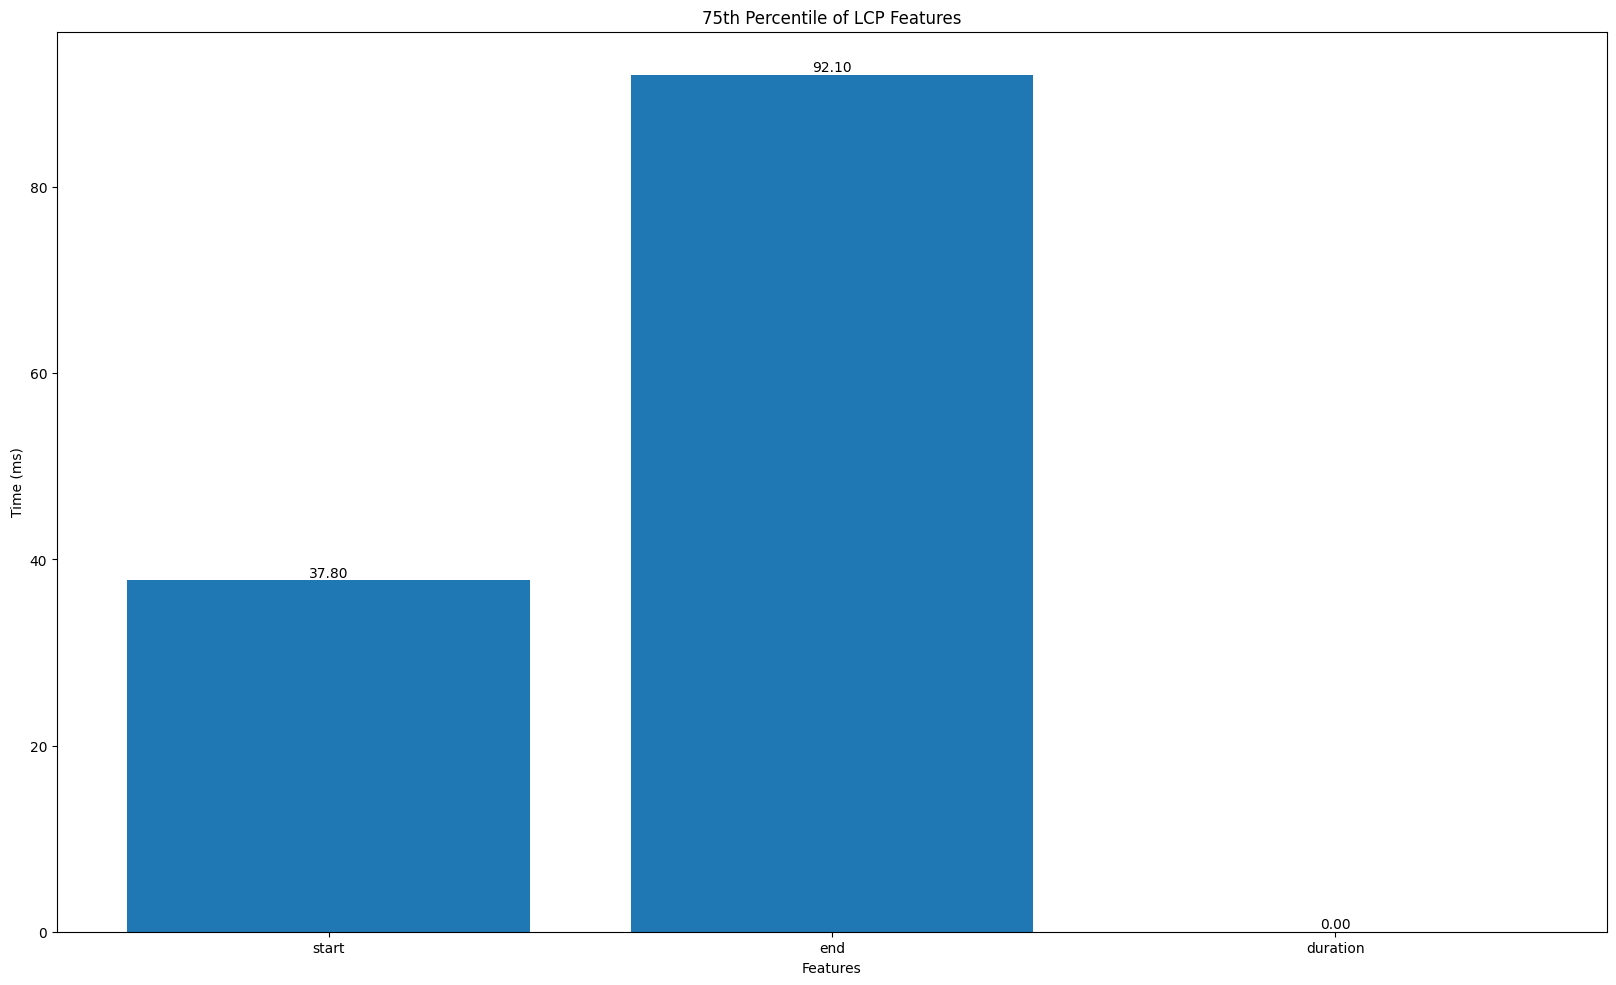

In [5]:
def plot_bar_chart(features, loc):
    percentiles = {f: df[f].quantile(0.75) for f in features}
    bars = loc.bar(percentiles.keys(), percentiles.values())
    
    for bar in bars:
        height = bar.get_height()
        loc.text(bar.get_x() + bar.get_width()/2., height,
                 f'{height:.2f}',
                 ha='center', va='bottom')
    
    loc.set_title("75th Percentile of LCP Features")
    loc.set_ylabel('Time (ms)')
    loc.set_xlabel('Features')

def graphs(plot_func, features, height=10):
    _, ax = plt.subplots(figsize=(20, height))
    plot_func(features, ax)
    plt.subplots_adjust(hspace=0.3, top=0.95, bottom=0.05)
    return plt

graphs(plot_bar_chart, target_features)
plt.show()

# EXPLANATION
- **startTime:** Returns the value of this entry's renderTime if it is not 0, otherwise the value of this entry's loadTime.
- **renderTime:** The time the element was rendered to the screen. May not be available if the element is a cross-origin image loaded without the Timing-Allow-Origin header.
- **loadTime:** The time the element was loaded.



In [6]:
comp_df = pd.read_csv(f'../../../data/core-web-vitals/testrun-6/details/details-csr-throttled.csv', sep=',')
comp_df = comp_df[comp_df['type'] == 'LCP']
comp_df.info()

FileNotFoundError: [Errno 2] No such file or directory: '../../../data/core-web-vitals/testrun-6/details/details-csr-throttled.csv'

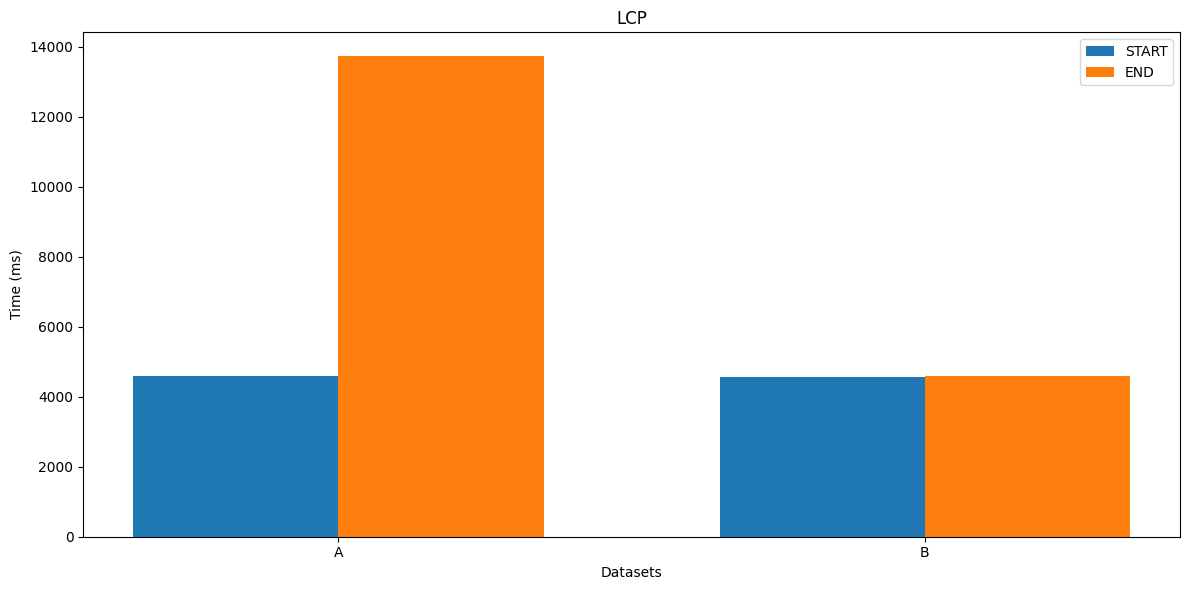

In [ ]:
metric_order = ['start', 'end']
bar_width = 0.35  

fig, ax = plt.subplots(figsize=(12, 6))

for i, metric in enumerate(metric_order):
    values = [df[metric].quantile(0.75), comp_df[metric].quantile(0.75)]
    positions = np.arange(len(values)) + i * bar_width
    ax.bar(positions, values, bar_width, label=metric.upper())

ax.set_xlabel('Datasets')
ax.set_ylabel('Time (ms)')
ax.set_title('LCP')
ax.set_xticks(np.arange(len(values)) + bar_width * (len(metric_order) - 1) / 2)
ax.set_xticklabels(['A', 'B'])
ax.legend()

# Adjust layout and display
plt.tight_layout()
plt.show()